In [1]:
import pandas as pd
import psycopg2

In [2]:
import matplotlib.pyplot as plt

In [3]:
conn = psycopg2.connect(database="db_sync", user="lukas", password="lukas")
cur = conn.cursor()

In [4]:
def sql(sql: str):
    return pd.read_sql(sql, conn)

**Zusammenhang: Sternebewertung und Wetterlage**

In [5]:
rev_count = sql("""
SELECT b.name, count(r.review_id) AS rev_count 
FROM business b JOIN review r ON b.business_id = r.business_id 
GROUP BY b.business_id
ORDER BY rev_count DESC LIMIT 15;""")

In [6]:
rev_count['name'] = rev_count['name'].str.rstrip()

<AxesSubplot:xlabel='name'>

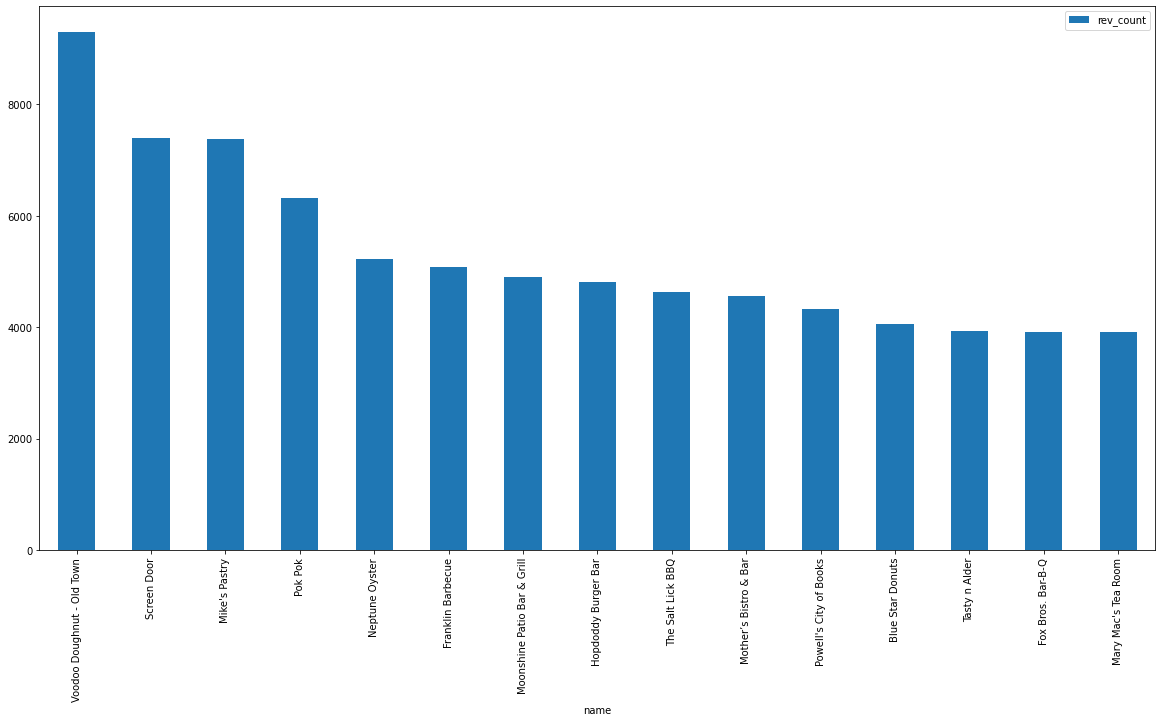

In [7]:
rev_count.plot.bar(x = "name", y = "rev_count", figsize=(20,10))

In [8]:
sql("SELECT business_id, name, review_count FROM business ORDER BY review_count DESC LIMIT 10;")

,business_id,name,review_count
0,4CxF8c3MB7VAdY8zFb2cZQ,Voodoo Doughnut - Old Town ...,9185
1,PrsvO1rzkgg6qFizlAoEtg,Mike's Pastry ...,7298
2,OQ2oHkcWA8KNC1Lsvj1SBA,Screen Door ...,7219
3,zioLxtBc9THNS2TOn9xW1w,Pok Pok ...,6221
4,y2w6rFaO0XEiG5mFfOsiFA,Neptune Oyster ...,5115
5,MGzro82Fi4LYvc86acoONQ,Franklin Barbecue ...,4942
6,cs6HfZNykLVitm09jWFqWg,Moonshine Patio Bar & Grill ...,4833
7,bZiIIUcpgxh8mpKMDhdqbA,Hopdoddy Burger Bar ...,4708
8,qLJUDPOamhLdbtfbcWyHnA,The Salt Lick BBQ ...,4524
9,n73rxa6e6-fTIxQzfv4BuA,Mother’s Bistro & Bar ...,4466


In [9]:
df = sql("""
SELECT b.business_id, r.stars, b.id_first, b.name, b.distance_first, s.id, s.name, w.prcp, w.date FROM review r
JOIN business b ON r.business_id = b.business_id
JOIN station s ON b.id_first = s.id 
JOIN weather w ON s.id = w.id
WHERE r.business_id = '4CxF8c3MB7VAdY8zFb2cZQ'
AND r.date = w.date
ORDER BY w.date DESC
""")
df

,business_id,stars,id_first,name,distance_first,id,name,prcp,date


In [10]:
# angepasste SQL: Auswahl der Station mit geringster Distanz
df = sql("""
SELECT b.business_id, r.stars, b.name, s.id, s.name, w.prcp, w.date FROM review r
JOIN business b ON r.business_id = b.business_id
JOIN station s ON s.id = 
CASE 
WHEN b.id_first IN (SELECT id FROM weather)  THEN b.id_first
WHEN b.id_second IN (SELECT id FROM weather) THEN b.id_second
ELSE b.id_third
END
JOIN weather w ON s.id = w.id
WHERE r.business_id = '4CxF8c3MB7VAdY8zFb2cZQ'
AND r.date = w.date
ORDER BY w.date DESC
""")
df

,business_id,stars,name,id,name,prcp,date
0,4CxF8c3MB7VAdY8zFb2cZQ,5.0,Voodoo Doughnut - Old Town ...,USC00356749,PORTLAND KGW-TV ...,33.0,2021-01-28
1,4CxF8c3MB7VAdY8zFb2cZQ,4.0,Voodoo Doughnut - Old Town ...,USC00356749,PORTLAND KGW-TV ...,3.0,2021-01-25
2,4CxF8c3MB7VAdY8zFb2cZQ,5.0,Voodoo Doughnut - Old Town ...,USC00356749,PORTLAND KGW-TV ...,0.0,2021-01-19
3,4CxF8c3MB7VAdY8zFb2cZQ,5.0,Voodoo Doughnut - Old Town ...,USC00356749,PORTLAND KGW-TV ...,3.0,2021-01-18
4,4CxF8c3MB7VAdY8zFb2cZQ,4.0,Voodoo Doughnut - Old Town ...,USC00356749,PORTLAND KGW-TV ...,13.0,2021-01-17
...,...,...,...,...,...,...,...
9244,4CxF8c3MB7VAdY8zFb2cZQ,3.0,Voodoo Doughnut - Old Town ...,USC00356749,PORTLAND KGW-TV ...,0.0,2007-01-24
9245,4CxF8c3MB7VAdY8zFb2cZQ,3.0,Voodoo Doughnut - Old Town ...,USC00356749,PORTLAND KGW-TV ...,0.0,2007-01-24
9246,4CxF8c3MB7VAdY8zFb2cZQ,4.0,Voodoo Doughnut - Old Town ...,USC00356749,PORTLAND KGW-TV ...,0.0,2007-01-23
9247,4CxF8c3MB7VAdY8zFb2cZQ,4.0,Voodoo Doughnut - Old Town ...,USC00356749,PORTLAND KGW-TV ...,5.0,2007-01-21


In [11]:
df = sql("""
SELECT * FROM business
WHERE business_id = '4CxF8c3MB7VAdY8zFb2cZQ'
""")
df

,is_open,business_id,id_third,id_second,id_first,name,address,city,state,postal,latitude,longitude,stars,review_count,distance_first,distance_second,distance_third,categories
0,1,4CxF8c3MB7VAdY8zFb2cZQ,US1ORMT0071,USC00356749,USW00024274,Voodoo Doughnut - Old Town ...,22 SW 3rd Ave,Portland,OR,97204,45.522612,-122.673084,3.5,9185,0.956167,1.833262,2.451589,None


In [12]:
df = sql("""
SELECT * FROM weather
WHERE id = 'USC00356749'
""")
df

,date,id,tmin,tmax,prcp,snow,snwd,acsc,tavg,psun,awnd
0,2007-01-01,USC00356749,0.0,56.0,38.0,NaN,NaN,None,None,None,None
1,2007-01-02,USC00356749,33.0,133.0,267.0,NaN,NaN,None,None,None,None
2,2007-01-03,USC00356749,50.0,111.0,191.0,NaN,NaN,None,None,None,None
3,2007-01-04,USC00356749,22.0,56.0,114.0,NaN,NaN,None,None,None,None
4,2007-01-05,USC00356749,17.0,56.0,165.0,NaN,NaN,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
5354,2021-10-18,USC00356749,72.0,167.0,3.0,NaN,NaN,None,None,None,None
5355,2021-10-19,USC00356749,56.0,156.0,0.0,NaN,NaN,None,None,None,None
5356,2021-10-20,USC00356749,106.0,156.0,56.0,NaN,NaN,None,None,None,None
5357,2021-10-21,USC00356749,100.0,206.0,157.0,NaN,NaN,None,None,None,None


In [13]:
# durchschnittlich vergebene Sterne und Niederschlagsmenge pro Tag, eingeschränkt auf ein Restaurant Voodoo Doughnut
df_stars_prcp = sql("""
SELECT w.date, AVG(r.stars) avg_stars, AVG(w.prcp) prcp FROM review r
JOIN business b ON r.business_id = b.business_id
JOIN station s ON b.id_second = s.id 
JOIN weather w ON s.id = w.id
WHERE r.business_id = '4CxF8c3MB7VAdY8zFb2cZQ'
AND r.date = w.date
GROUP BY w.date
ORDER BY w.date DESC
""")
df_stars_prcp

,date,avg_stars,prcp
0,2021-01-28,5.000000,33.0
1,2021-01-25,4.000000,3.0
2,2021-01-19,5.000000,0.0
3,2021-01-18,5.000000,3.0
4,2021-01-17,4.000000,13.0
...,...,...,...
3617,2007-02-02,5.000000,0.0
3618,2007-01-24,3.666667,0.0
3619,2007-01-23,4.000000,0.0
3620,2007-01-21,4.000000,5.0


In [41]:
# durchschnittlich vergebene Sterne, Niederschlagsmenge, Durchschnittstemperatur pro Tag 
# über alle Restaurants in Portland
df_stars_weather = sql("""
SELECT w.date, AVG(r.stars) avg_stars, AVG(w.prcp) prcp, ((AVG(w.tmin) + AVG(w.tmax))/2) tavg FROM review r
JOIN business b ON r.business_id = b.business_id
JOIN station s ON b.id_first = s.id 
JOIN weather w ON s.id = w.id
WHERE r.date = w.date
AND b.city = 'Portland'
GROUP BY w.date
ORDER BY w.date DESC
""")
df_stars_weather

,date,avg_stars,prcp,tavg
0,2021-01-28,4.444444,35.555556,61.000000
1,2021-01-27,3.769231,70.320000,42.954545
2,2021-01-26,4.371429,27.400000,37.611111
3,2021-01-25,4.333333,63.424242,39.500000
4,2021-01-24,4.413043,43.804348,31.558824
...,...,...,...,...
5087,2007-01-06,4.500000,69.000000,80.500000
5088,2007-01-05,5.000000,165.000000,36.500000
5089,2007-01-04,4.500000,114.000000,39.000000
5090,2007-01-02,2.750000,267.000000,83.000000


In [42]:
df_stars_weather.max()

date         2021-01-28
avg_stars             5
prcp                782
tavg                325
dtype: object

<AxesSubplot:xlabel='prcp', ylabel='avg_stars'>

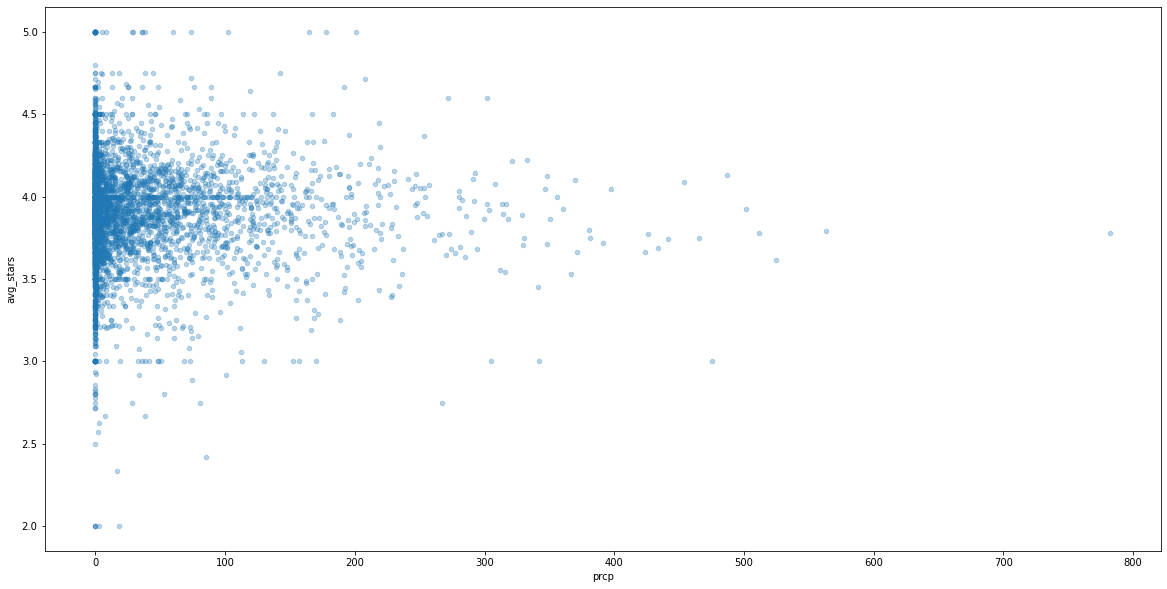

In [43]:
df_stars_weather.plot.scatter(x = "prcp", y = "avg_stars", figsize=(20,10), alpha = 0.3)

<AxesSubplot:xlabel='tavg', ylabel='avg_stars'>

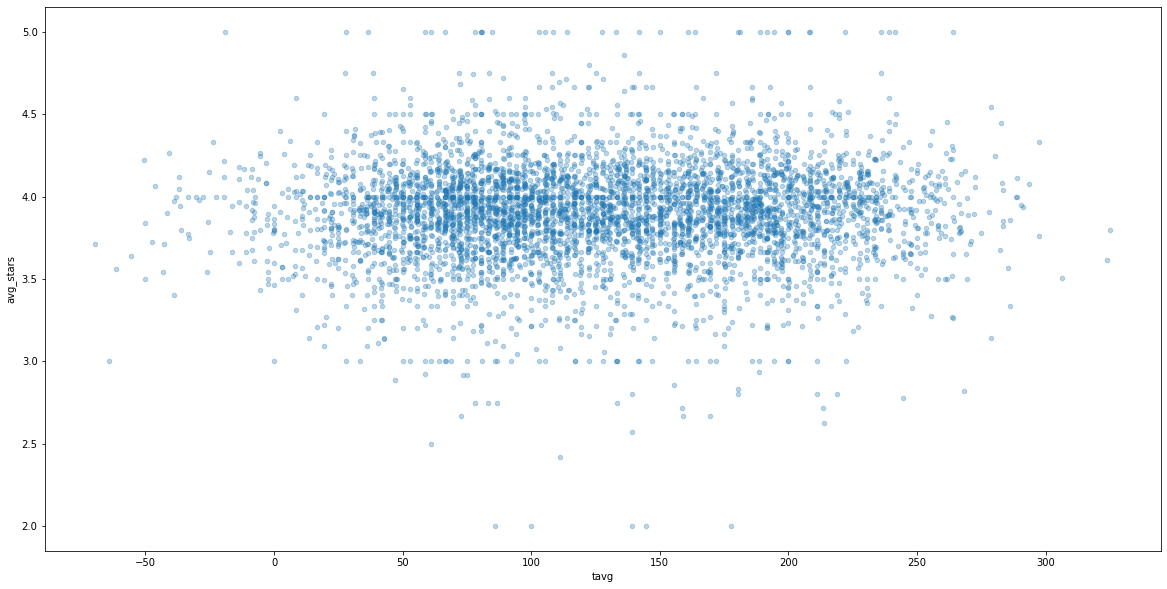

In [44]:
df_stars_weather.plot.scatter(x = "tavg", y = "avg_stars", figsize=(20,10), alpha = 0.3)

**Analyse Reviews**

In [14]:
from textblob import TextBlob

In [15]:
review = sql("""
SELECT * FROM review LIMIT 20000;
""")
review

,review_id,business_id,user_id,stars,date,text,useful,funny,cool
0,Sh9D4kNx2jZEUFa7hWl95Q,1Eq16r_MSnvPsnIykBdy9w,K2hRhu2g-LR4qpxDsaAtzQ,4.0,2013-06-07,My boo and I had to wait a while to be seated ...,0,0,0
1,ZFWsqiz8z2hdMsRUJnY5ew,dYXxlxipUUVJaca3VtMmpw,NdZVuuN0f74bicgzqFwo3A,5.0,2010-02-08,"Yes the Veg Mezza is great, but the thin flatb...",0,0,0
2,b9gosrZ8DdF0bXNgCoTPTg,291-l1sR4AEjKQ-GLVXOMw,xi2pa5CqpB-8_4zrgDA0VQ,5.0,2014-12-26,"delicious, ingredients are all up front, super...",1,0,0
3,FGgQSCfzcYbmJHJGmMcaPQ,CjmBDPwzX6d4b8ksnx83zg,6wSJvOqH5Urs2TVSrEfjGg,1.0,2016-07-21,The only positive was the cider and the servic...,2,0,0
4,CEjp-ZtqBS2gcfyZ1ZskgQ,8wZNGlsd3n4nWm6klbh_-g,PtTejzxrcrhQf52yBoV4-g,4.0,2012-05-17,We came here for lunch and had a good experien...,0,0,0
...,...,...,...,...,...,...,...,...,...
19995,FZu-yoYYJrNiTYTSjXTP8w,uuRR6UcHPDD29JoAyrcKWA,zy41wmJsqvzCuUpusBBrTg,2.0,2014-04-30,My mom and I went on Black Friday in the eveni...,3,0,1
19996,SeXbPO-EdO6He46RYyT9sQ,yE3FMBaomO9Wjm4HxkK-Vg,gZdn-T8VUo6_VdrZlSf-cw,4.0,2015-01-13,Great food for the price. And excellent servic...,0,0,0
19997,QLIlHFWSVinV6Kmf9omtNA,erXrKlXvgDRy0UKV0SXOJw,ggl6fl-PM5O1WrdReL0l4A,2.0,2012-11-24,Maybe my expectations were not set correctly. ...,2,0,0
19998,zjEh0UPv5_PiD72J68cNVw,Rerq52RA7ryexgZiAKQAdA,6vUk3LYF38DKDkHtvsGi0A,4.0,2015-03-09,I can only speak for the kalbi (marinated shor...,3,0,1


In [16]:
review["sentiment.polarity"] = review.apply(lambda row: TextBlob(row.text).sentiment.polarity, axis = 1)

<AxesSubplot:title={'center':'sentiment.polarity'}, xlabel='stars'>

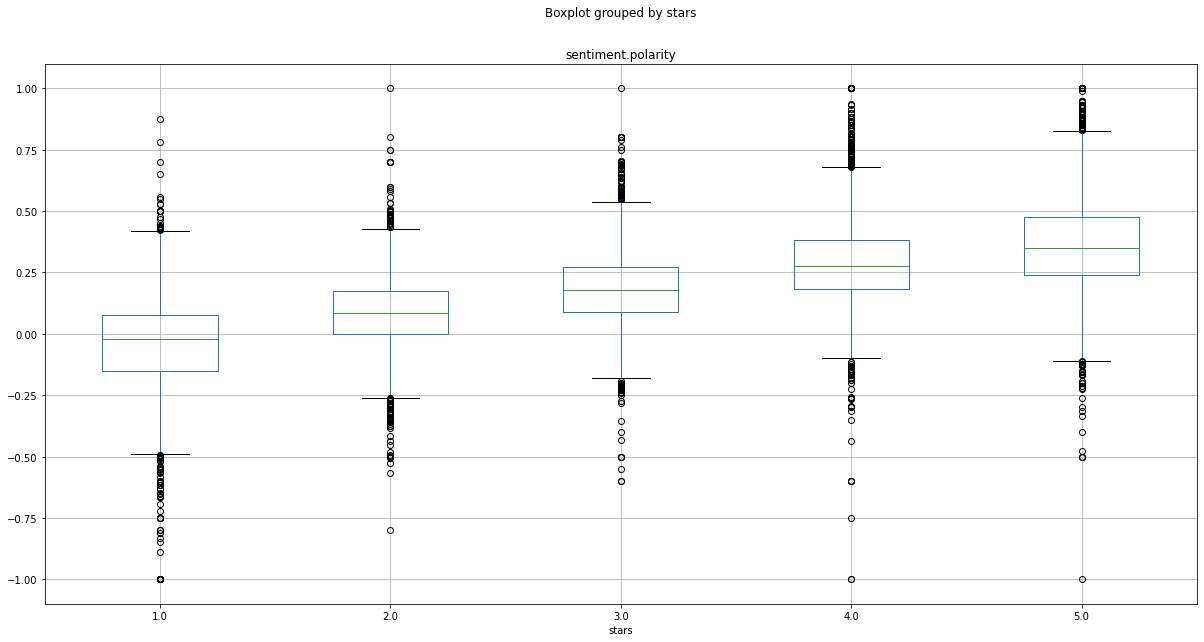

In [17]:
review.boxplot(column = "sentiment.polarity", by = "stars", figsize=(20,10))

In [18]:
review

,review_id,business_id,user_id,stars,date,text,useful,funny,cool,sentiment.polarity
0,Sh9D4kNx2jZEUFa7hWl95Q,1Eq16r_MSnvPsnIykBdy9w,K2hRhu2g-LR4qpxDsaAtzQ,4.0,2013-06-07,My boo and I had to wait a while to be seated ...,0,0,0,0.378030
1,ZFWsqiz8z2hdMsRUJnY5ew,dYXxlxipUUVJaca3VtMmpw,NdZVuuN0f74bicgzqFwo3A,5.0,2010-02-08,"Yes the Veg Mezza is great, but the thin flatb...",0,0,0,0.237500
2,b9gosrZ8DdF0bXNgCoTPTg,291-l1sR4AEjKQ-GLVXOMw,xi2pa5CqpB-8_4zrgDA0VQ,5.0,2014-12-26,"delicious, ingredients are all up front, super...",1,0,0,0.575521
3,FGgQSCfzcYbmJHJGmMcaPQ,CjmBDPwzX6d4b8ksnx83zg,6wSJvOqH5Urs2TVSrEfjGg,1.0,2016-07-21,The only positive was the cider and the servic...,2,0,0,0.203512
4,CEjp-ZtqBS2gcfyZ1ZskgQ,8wZNGlsd3n4nWm6klbh_-g,PtTejzxrcrhQf52yBoV4-g,4.0,2012-05-17,We came here for lunch and had a good experien...,0,0,0,0.382832
...,...,...,...,...,...,...,...,...,...,...
19995,FZu-yoYYJrNiTYTSjXTP8w,uuRR6UcHPDD29JoAyrcKWA,zy41wmJsqvzCuUpusBBrTg,2.0,2014-04-30,My mom and I went on Black Friday in the eveni...,3,0,1,0.066667
19996,SeXbPO-EdO6He46RYyT9sQ,yE3FMBaomO9Wjm4HxkK-Vg,gZdn-T8VUo6_VdrZlSf-cw,4.0,2015-01-13,Great food for the price. And excellent servic...,0,0,0,0.766667
19997,QLIlHFWSVinV6Kmf9omtNA,erXrKlXvgDRy0UKV0SXOJw,ggl6fl-PM5O1WrdReL0l4A,2.0,2012-11-24,Maybe my expectations were not set correctly. ...,2,0,0,0.075000
19998,zjEh0UPv5_PiD72J68cNVw,Rerq52RA7ryexgZiAKQAdA,6vUk3LYF38DKDkHtvsGi0A,4.0,2015-03-09,I can only speak for the kalbi (marinated shor...,3,0,1,0.161111


In [12]:
from sklearn.linear_model import LinearRegression

In [14]:
plt.rcParams["figure.figsize"] = (20,10)

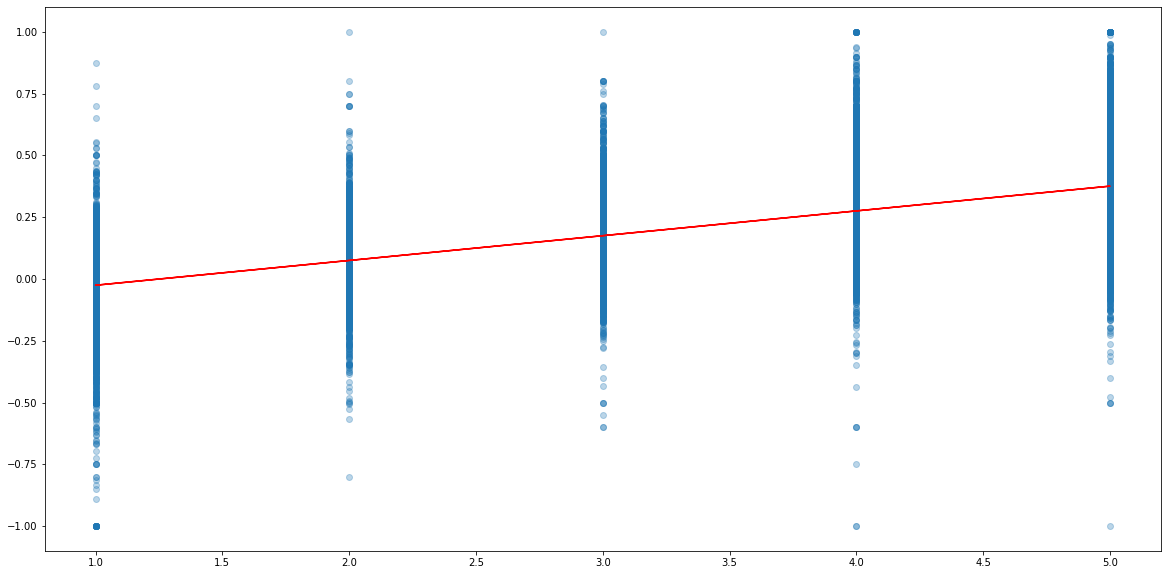

In [21]:
x = review["stars"].values.reshape(-1, 1)
y = review["sentiment.polarity"].values.reshape(-1, 1)
lin_reg = LinearRegression()
lin_reg.fit(x, y)
y_pred = lin_reg.predict(x)

plt.scatter(x,y, alpha = 0.3)
plt.plot(x, y_pred, color='red')
plt.show()

In [24]:
lin_reg.coef_

array([[0.10225666]])

In [22]:
from collections import Counter

In [23]:
def getFreqDict(pos, stars):
    rev_stars = review[review['stars']==stars]

    adj = []
    for index, row in rev_stars.iterrows():
        tb = TextBlob(row.text)
        for tag in tb.tags:
            if tag[1] == pos:
                adj.append(tag[0])
            
    counter = Counter(adj)
    freq_dict = {}
    for i in range(len(counter)):
        freq_dict[list(counter.keys())[i]] = list(counter.values())[i]
    return freq_dict

In [24]:
freq_dict_1_stars = getFreqDict('JJ', 1)

In [25]:
freq_dict_2_stars = getFreqDict('JJ', 2)

In [26]:
freq_dict_3_stars = getFreqDict('JJ', 3)

In [27]:
freq_dict_4_stars = getFreqDict('JJ', 4)

In [28]:
freq_dict_5_stars = getFreqDict('JJ', 5)

In [29]:
freq_dicts = [freq_dict_1_stars, freq_dict_2_stars, freq_dict_3_stars, freq_dict_4_stars, freq_dict_5_stars]

In [30]:
from wordcloud import WordCloud

In [35]:
def plotFreqDict(stars):
    freq = pd.DataFrame.from_dict(freq_dicts[stars-1], orient='index', columns=['count'])
    freq_sorted = freq.sort_values(by = 'count', ascending=False)[:10]
    freq_sorted.plot.bar(legend=False)
    title = 'Häufigkeitsverteilung (nur Adjektive) der ' + str(stars) + '-Sterne-Bewertungen'
    plt.title(title)
    plt.show()

    wordcloud = WordCloud(background_color="white",width=1920, height=1080).generate_from_frequencies(freq_dicts[stars-1])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [32]:
plt.rcParams.update({'font.size': 22})

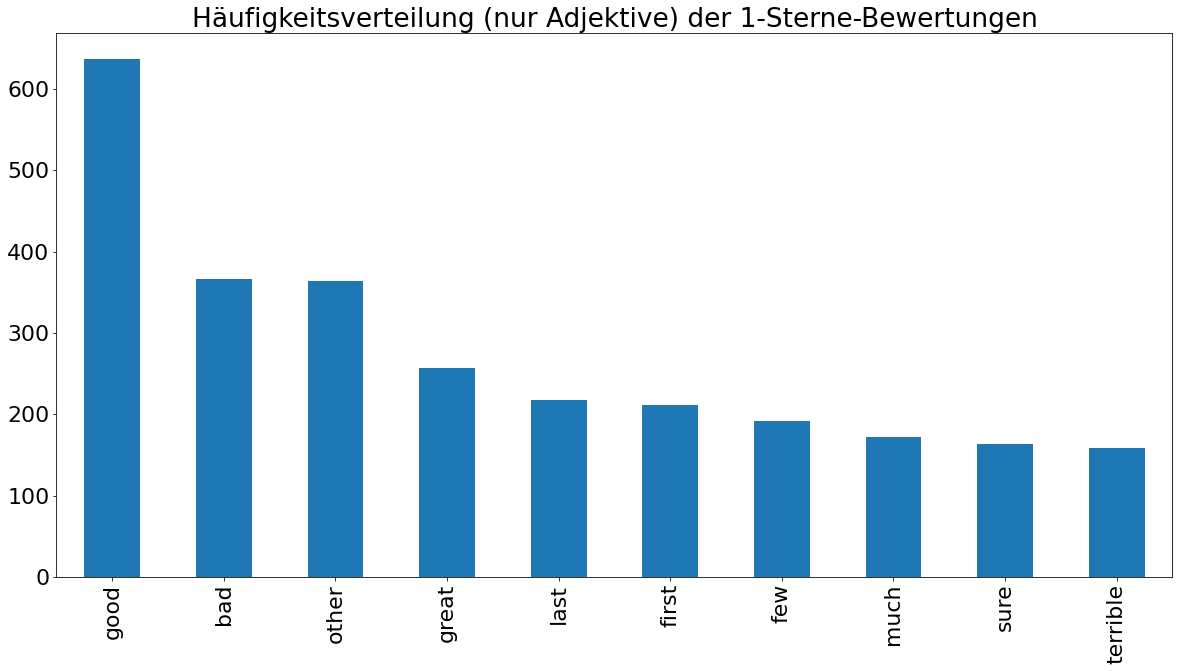

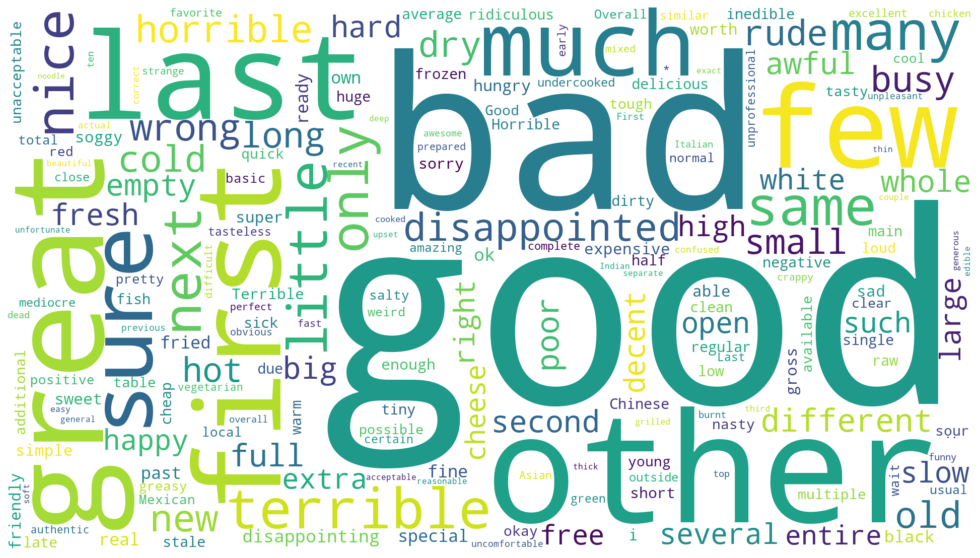

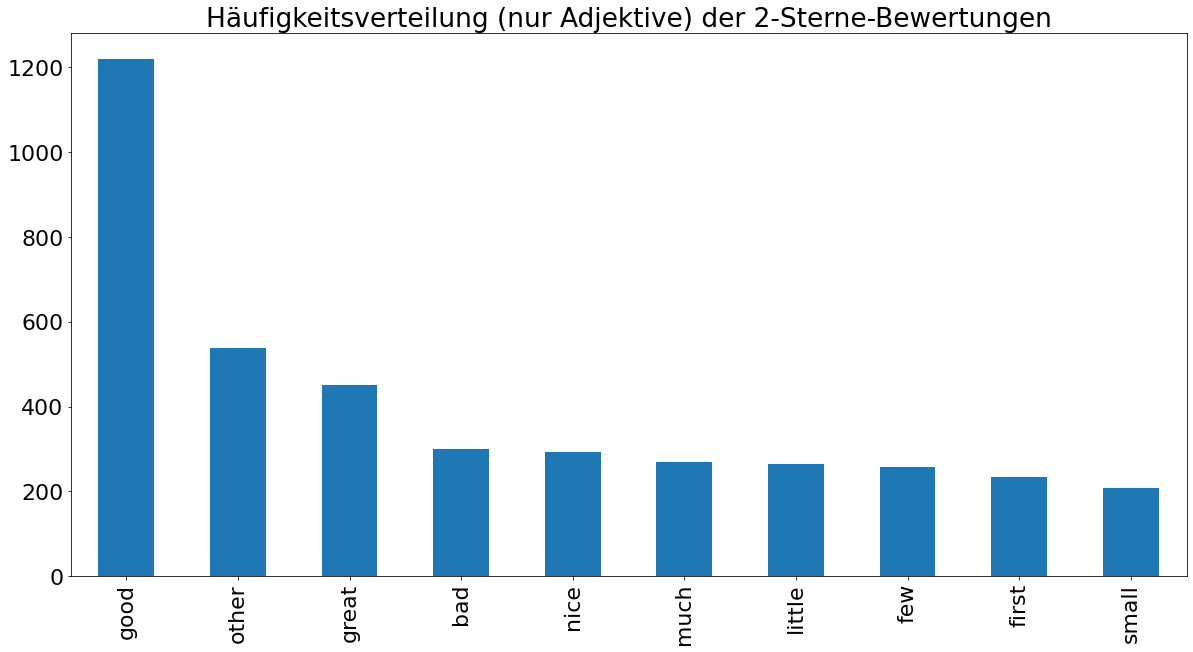

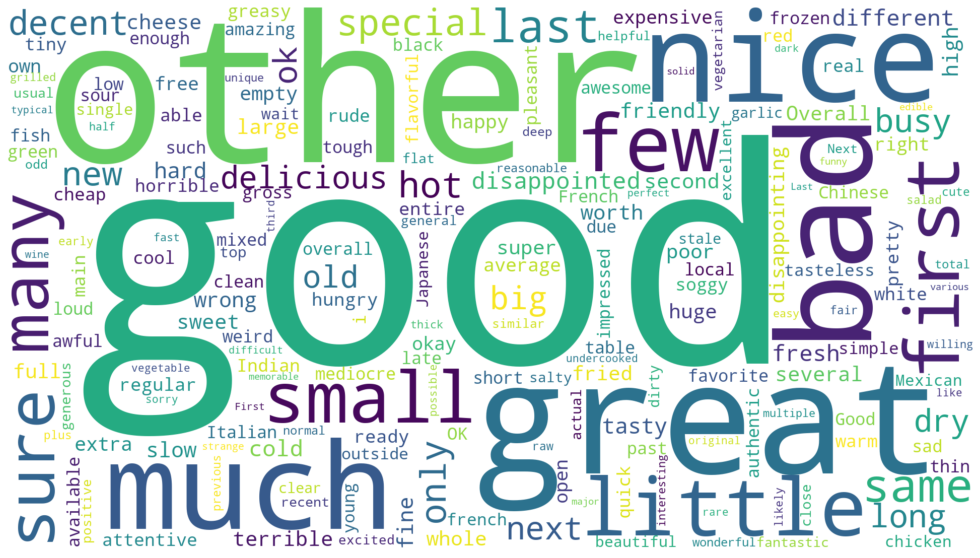

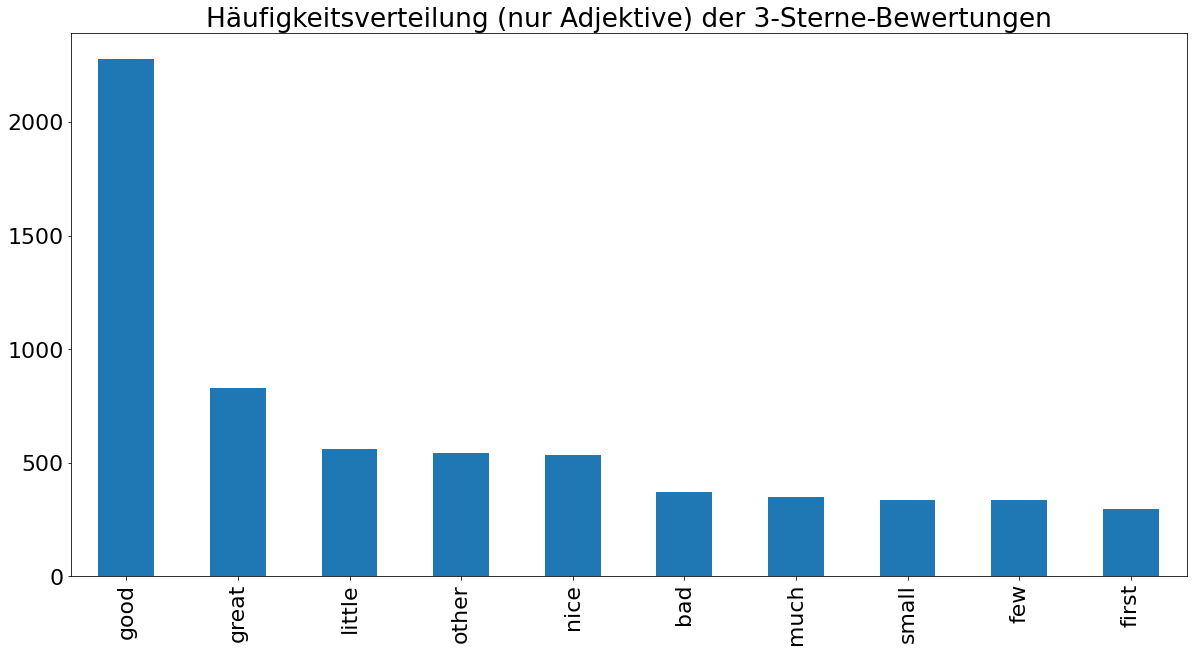

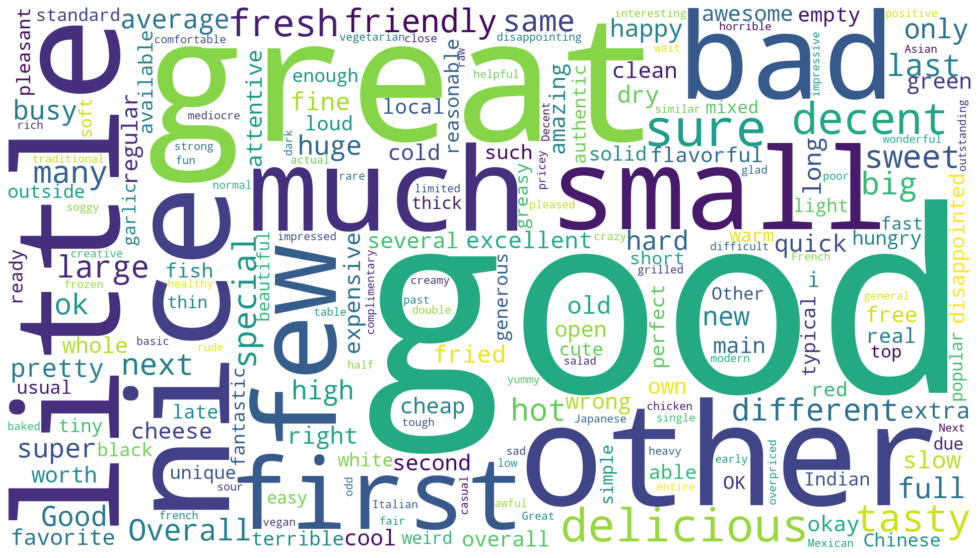

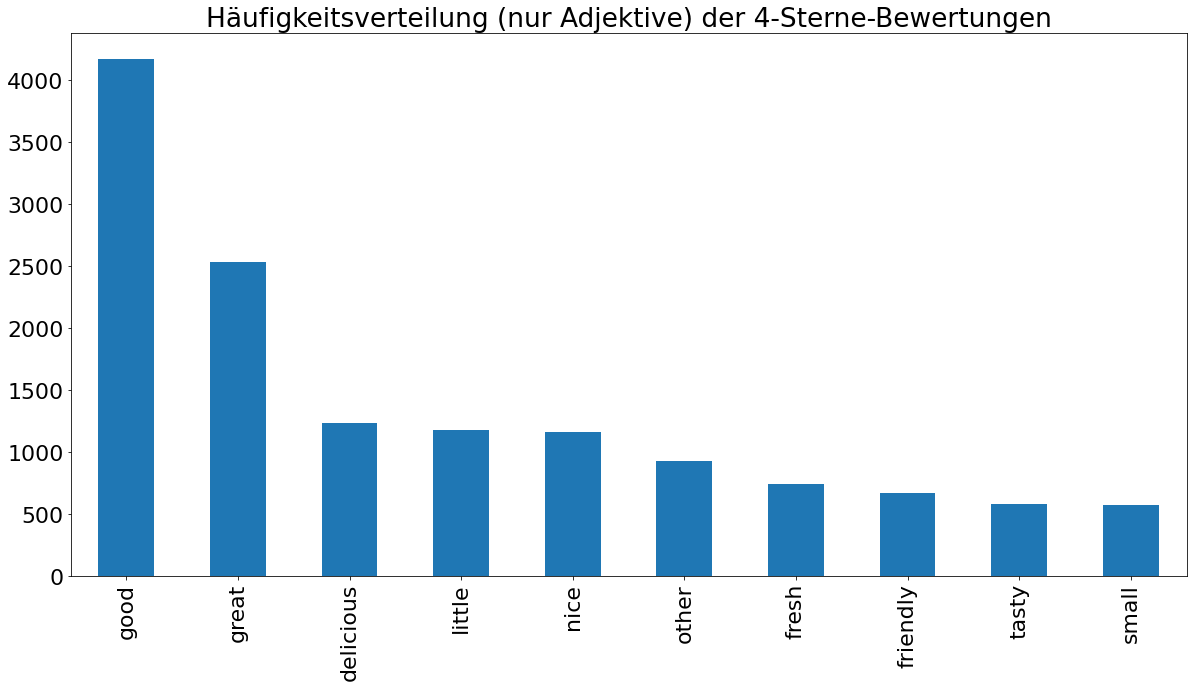

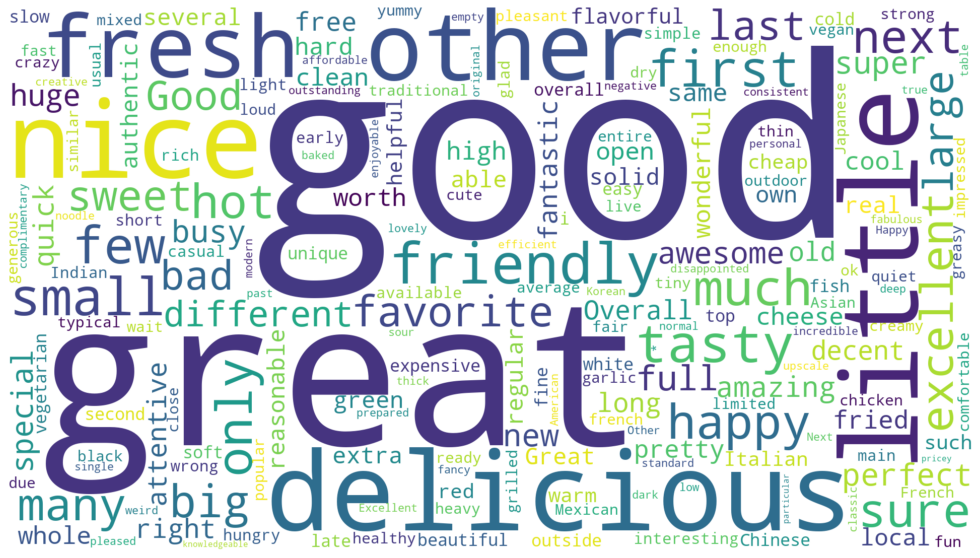

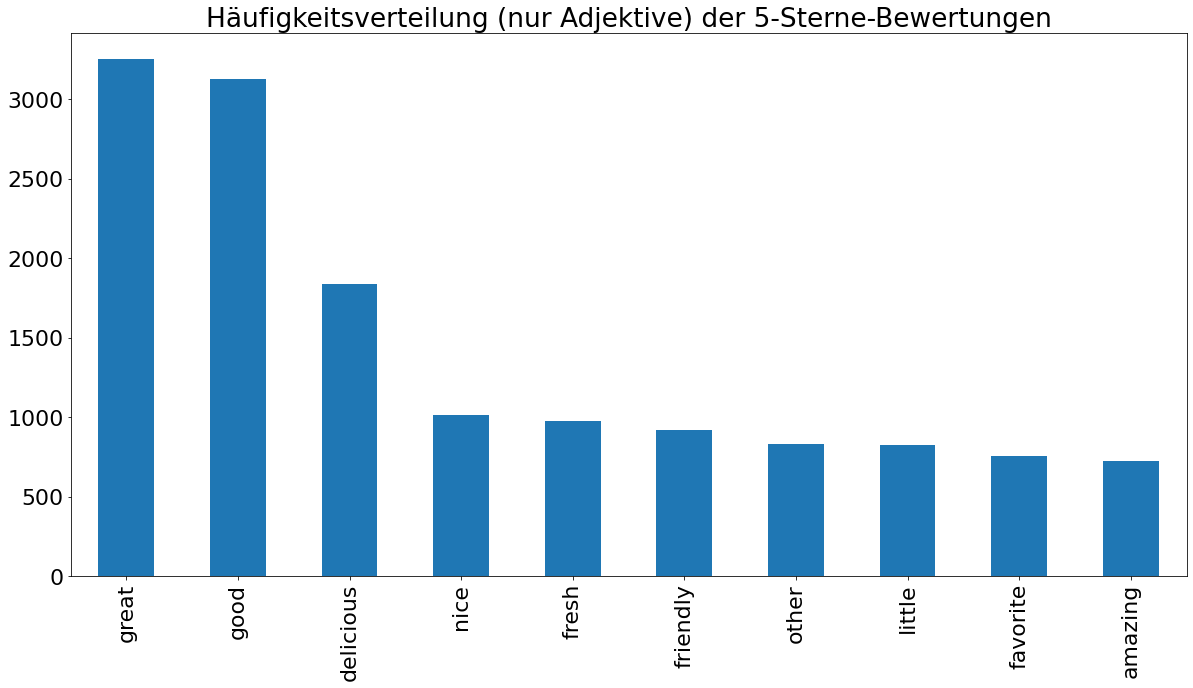

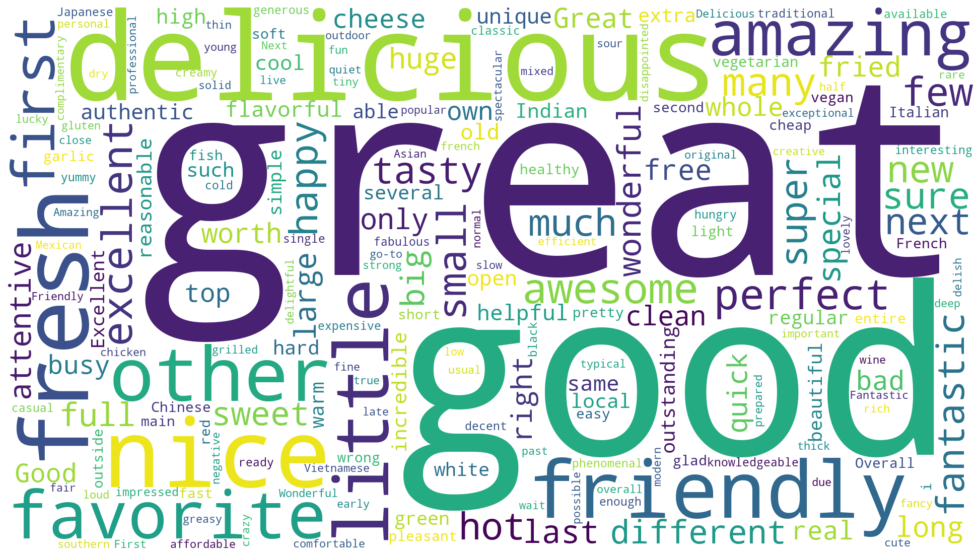

In [36]:
for i in range(5):
    plotFreqDict(i+1)

**Analyse Kategorie**

<AxesSubplot:xlabel='city'>

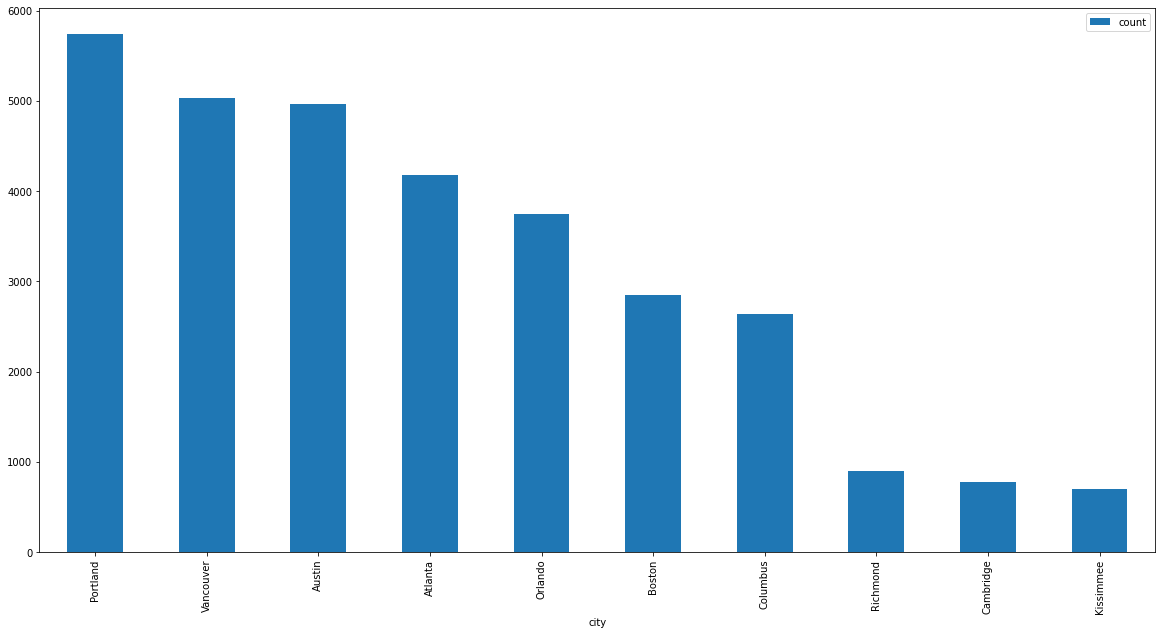

In [5]:
df = sql("""
SELECT city, COUNT(business_id) count FROM business
GROUP BY city
ORDER BY count DESC
LIMIT 10;""") 
df.plot.bar(x = "city", y = "count", figsize=(20,10))

In [6]:
df = sql("""
SELECT b.city, c.categories, COUNT(c.categories) count_cat FROM business b 
JOIN has_categorie h ON b.business_id = h.business_id
JOIN categorie c ON h.categorie_id = c.categorie_id
WHERE c.categories <> 'Restaurants'
GROUP BY b.city, c.categories
ORDER BY count_cat DESC;""") 
df

,city,categories,count_cat
0,Portland,Food,2493
1,Austin,Food,2086
2,Vancouver,Food,1654
3,Portland,Nightlife,1317
4,Portland,Bars,1259
...,...,...,...
19207,Somerville,Specialty Schools,1
19208,Buda,Coffee Roasteries,1
19209,Dedham,Internet Service Providers,1
19210,New Albany,Tex-Mex,1


In [7]:
df = df[(df['city']=='Portland') | (df['city']=='Vancouver') | (df['city']=='Austin') | (df['city']=='Atlanta')].head(20)

In [8]:
df = df.pivot(index = ['categories'], columns = 'city', values = 'count_cat')

In [9]:
df

city,Atlanta,Austin,Portland,Vancouver
categories,,,,
American (New),682.0,NaN,650.0,NaN
American (Traditional),NaN,NaN,724.0,NaN
Bars,870.0,749.0,1259.0,NaN
Breakfast & Brunch,NaN,NaN,736.0,NaN
Food,1112.0,2086.0,2493.0,1654.0
Food Trucks,NaN,680.0,727.0,NaN
Mexican,NaN,885.0,NaN,NaN
Nightlife,912.0,812.0,1317.0,655.0
Sandwiches,NaN,662.0,801.0,NaN


<AxesSubplot:xlabel='categories'>

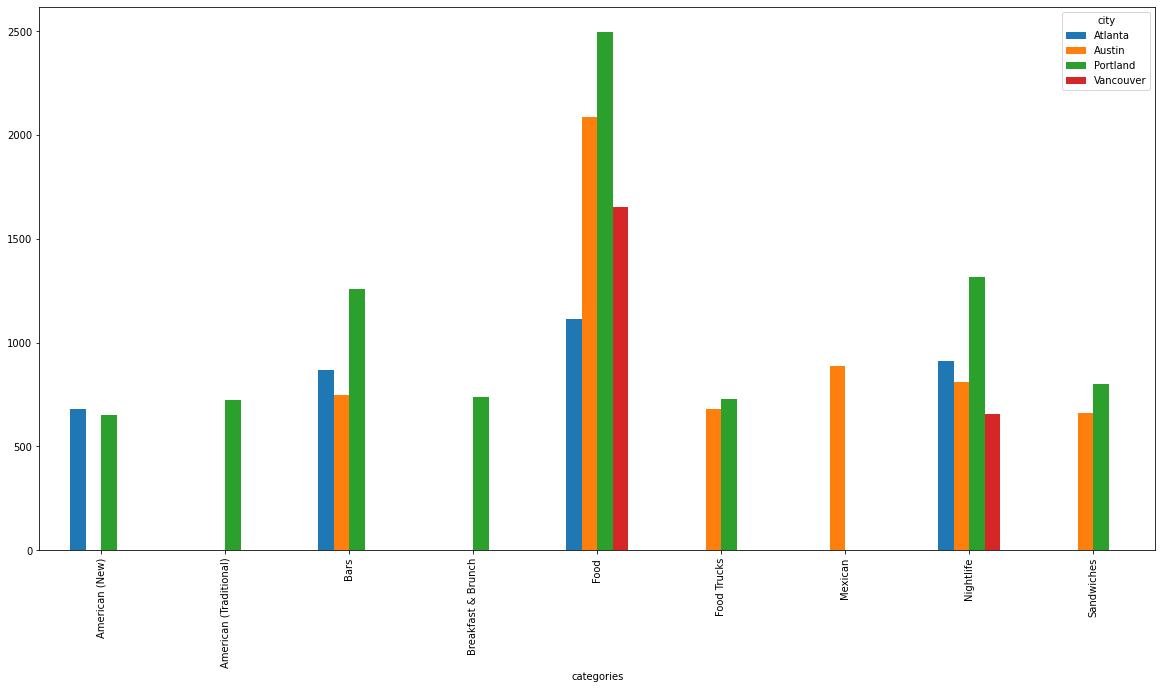

In [26]:
df.plot.bar(figsize=(20,10))

**Zusammenhang Restaurantkategorien und sozio-demographische Merkmale**

In [10]:
sql("""
SELECT * FROM socio LIMIT 10;""")

,postal,unemployment_rate,population,native,asian,pacific,other,hispanic,white,below_poverty,above_poverty,no_highschool,highschool,college,bachelor,male,female,mean_income
0,80002,3.7,15690,122,214,11,254,3613,11556,1553,10942,1299,2787,3379,3704,6043,6452,79753
1,80003,4.0,29559,465,1262,0,1153,6509,20591,1726,20643,1799,5640,6667,6222,10902,11486,83447
2,80004,4.6,30356,322,328,16,502,3373,25411,1260,20544,1073,4973,6260,7881,10939,10898,95678
3,80005,3.4,23588,75,486,36,142,1834,20838,439,16124,215,2458,5026,7688,8040,8523,124696
4,80007,1.9,10306,91,359,0,176,843,8946,50,7919,210,888,1499,5119,3772,4197,172233
5,80010,6.3,32273,611,2120,24,6657,15221,8490,4505,21938,6681,7548,5695,2947,14226,12530,55371
6,80011,5.3,39195,555,2121,211,6008,16372,12658,3722,27923,6445,10789,7160,3742,16286,15553,63309
7,80012,6.6,40535,542,2389,148,3989,11254,15677,3614,28447,5047,8050,8593,6496,15777,16324,68017
8,80013,3.9,57711,326,4818,52,2946,11018,32437,3159,43138,2695,10776,15129,13374,22631,23667,92981
9,80014,4.0,33395,230,2430,54,1704,4892,21125,1858,21758,1394,4572,6909,8248,11791,11882,73616


In [11]:
sql("""
SELECT count(*) FROM socio;""")

,count
0,6934


In [12]:
sql("""
SELECT count(*) FROM business;""")

,count
0,50791


In [13]:
sql("""
SELECT count(*) FROM socio s
JOIN business b ON CAST(s.postal AS VARCHAR) = b.postal
""")

,count
0,32384


In [58]:
cur.execute("""DELETE FROM socio WHERE population=0;""")

In [64]:
cur.execute("""ALTER TABLE socio DROP COLUMN native_ratio;""")

InFailedSqlTransaction: current transaction is aborted, commands ignored until end of transaction block


In [67]:
cur.execute("""ALTER TABLE socio ADD native_ratio numeric(6,4) GENERATED ALWAYS AS (native/population) STORED;""")

DivisionByZero: division by zero


In [7]:
sql("""
SELECT * FROM socio s;
""")

,postal,unemployment_rate,population,native,asian,pacific,other,hispanic,white,below_poverty,...,hispanic_ratio,white_ratio,below_poverty_ratio,above_poverty_ratio,no_highschool_ratio,highschool_ratio,college_ratio,bachelor_ratio,male_ratio,female_ratio
0,80002,3.7,15690,122,214,11,254,3613,11556,1553,...,0.2303,0.7365,0.0990,0.6974,0.0828,0.1776,0.2154,0.2361,0.3851,0.4112
1,80003,4.0,29559,465,1262,0,1153,6509,20591,1726,...,0.2202,0.6966,0.0584,0.6984,0.0609,0.1908,0.2255,0.2105,0.3688,0.3886
2,80004,4.6,30356,322,328,16,502,3373,25411,1260,...,0.1111,0.8371,0.0415,0.6768,0.0353,0.1638,0.2062,0.2596,0.3604,0.3590
3,80005,3.4,23588,75,486,36,142,1834,20838,439,...,0.0778,0.8834,0.0186,0.6836,0.0091,0.1042,0.2131,0.3259,0.3409,0.3613
4,80007,1.9,10306,91,359,0,176,843,8946,50,...,0.0818,0.8680,0.0049,0.7684,0.0204,0.0862,0.1454,0.4967,0.3660,0.4072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6856,99363,4.2,34011,207,709,52,2082,6117,25305,2551,...,0.1799,0.7440,0.0750,0.5368,0.0704,0.1113,0.2455,0.1694,0.3817,0.3182
6857,99371,4.2,34011,207,709,52,2082,6117,25305,2551,...,0.1799,0.7440,0.0750,0.5368,0.0704,0.1113,0.2455,0.1694,0.3817,0.3182
6858,99401,18.9,187,0,0,0,50,108,79,119,...,0.5775,0.4225,0.6364,0.0856,0.4118,0.1497,0.1176,0.0428,0.2995,0.4225
6859,99402,9.9,256,1,2,0,0,10,238,22,...,0.0391,0.9297,0.0859,0.5547,0.0703,0.2344,0.2148,0.1055,0.2852,0.3555


In [5]:
soc = sql("""
SELECT b.business_id, b.name, b.city, b.state, b.stars, c.categories, s.* FROM socio s
JOIN business b ON CAST(s.postal AS VARCHAR) = b.postal
JOIN has_categorie h ON b.business_id = h.business_id
JOIN categorie c ON h.categorie_id = c.categorie_id;
""")
soc

,business_id,name,city,state,stars,categories,postal,unemployment_rate,population,native,...,white_ratio,black_ratio,below_poverty_ratio,above_poverty_ratio,no_highschool_ratio,highschool_ratio,college_ratio,bachelor_ratio,male_ratio,female_ratio
0,SZnLkA6yt6ygmnmLJ2GAaA,Little Caesars ...,Richmond,VA,2.0,Pizza,23234,9.5,35185,394,...,0.263862,0.503339,0.125139,0.644678,0.150433,0.221685,0.191729,0.128947,0.363962,0.405883
1,SZnLkA6yt6ygmnmLJ2GAaA,Little Caesars ...,Richmond,VA,2.0,Restaurants,23234,9.5,35185,394,...,0.263862,0.503339,0.125139,0.644678,0.150433,0.221685,0.191729,0.128947,0.363962,0.405883
2,rCHBJLwV_kI4hgzKARy5RQ,My Parents' Basement ...,Avondale Estates,GA,4.0,Mags,30002,3.8,4805,40,...,0.547138,0.364412,0.110718,0.689490,0.024766,0.113424,0.192716,0.413736,0.351717,0.448491
3,rCHBJLwV_kI4hgzKARy5RQ,My Parents' Basement ...,Avondale Estates,GA,4.0,Bars,30002,3.8,4805,40,...,0.547138,0.364412,0.110718,0.689490,0.024766,0.113424,0.192716,0.413736,0.351717,0.448491
4,rCHBJLwV_kI4hgzKARy5RQ,My Parents' Basement ...,Avondale Estates,GA,4.0,Comic Books,30002,3.8,4805,40,...,0.547138,0.364412,0.110718,0.689490,0.024766,0.113424,0.192716,0.413736,0.351717,0.448491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156682,muDUnYAv9z3mJffkdIaHSA,Fatty Patty's ...,Vancouver,WA,3.5,Restaurants,98686,4.9,16547,36,...,0.862875,0.008400,0.062670,0.663504,0.025503,0.132048,0.256723,0.237747,0.361999,0.364175
156683,kFO3HAxQCwqxM7BgET3nsw,Blazzin Pizza ...,Vancouver,WA,2.0,Pizza,98686,4.9,16547,36,...,0.862875,0.008400,0.062670,0.663504,0.025503,0.132048,0.256723,0.237747,0.361999,0.364175
156684,kFO3HAxQCwqxM7BgET3nsw,Blazzin Pizza ...,Vancouver,WA,2.0,Restaurants,98686,4.9,16547,36,...,0.862875,0.008400,0.062670,0.663504,0.025503,0.132048,0.256723,0.237747,0.361999,0.364175
156685,RxLO8XFZ1BmJ8Gy5wtCllA,UnPhogettable ...,Vancouver,WA,3.5,Vietnamese,98686,4.9,16547,36,...,0.862875,0.008400,0.062670,0.663504,0.025503,0.132048,0.256723,0.237747,0.361999,0.364175


In [6]:
# restaurants per postal code
soc_res = soc.groupby(by = "postal").agg({"business_id" : "count"})
soc_res = soc_res.reset_index()
soc_res.columns = ["postal", "restaurant_count"]
soc_res = soc_res.loc[soc_res["restaurant_count"] > 5]
soc_res

,postal,restaurant_count
1,30002,84
3,30021,107
4,30030,917
5,30032,338
6,30033,571
...,...,...
376,98682,67
377,98683,538
378,98684,384
379,98685,43


In [7]:
soc.drop(soc[soc["population"]==0].index, inplace = True)

In [8]:
socios = ["native", "asian", "pacific", "other", "hispanic", "white", "black", "below_poverty", "above_poverty",
          "no_highschool", "highschool", "college", "bachelor", "male", "female"]

for socio in socios:
    socio_ratio = socio + "_ratio"
    soc[socio_ratio] = soc.apply(lambda row: row[socio]/row.population, axis = 1)

In [9]:
soc["native_ratio"] = soc.apply(lambda row: row.native/row.population, axis = 1)

soc["asian_rat"] = soc.apply(lambda row: row.asian/row.population, axis = 1)
soc["pacific_rat"] = soc.apply(lambda row: row.asian/row.population, axis = 1)
soc["hispanic_rat"] = soc.apply(lambda row: row.pacific/row.population, axis = 1)

calc = ["native"]
#soc["below_poverty_rat"] = soc.apply(lambda row: row.below_poverty/row.population, axis = 1)

In [33]:
def plot_soc_cat(soc_rat, cat_list):
    soc_cat = soc[soc["categories"].isin(cat_list)]
    
    soc_cat_agg = soc_cat.groupby(by = "postal").agg({"categories" : ['count'] , soc_rat : ['max']})
    soc_cat_agg = soc_cat_agg.reset_index()
    soc_cat_agg.columns = ["postal", "categories", soc_rat]
    
    soc_cat_rate = pd.merge(soc_res, soc_cat_agg, on = "postal")
    soc_cat_rate["categories_rat"] = soc_cat_rate.apply(lambda row: row.categories/row.restaurant_count, axis = 1)
    
    x = soc_cat_rate["categories_rat"].values.reshape(-1, 1)
    y = soc_cat_rate[soc_rat].values.reshape(-1, 1)
    lin_reg = LinearRegression()
    lin_reg.fit(x, y)
    y_pred = lin_reg.predict(x)

    plt.scatter(x,y)
    plt.plot(x, y_pred, color='red')
    plt.xlabel("Anteil der Restaurants mit Kategorie(n): " + ", ".join(cat_list), fontsize = 16)
    #plt.ylabel("Bevölkerungsmerkmal: " + soc_rat, fontsize = 16)
    #plt.ylabel("Anteil der asiatischen Bevölkerung", fontsize = 16)
    plt.ylabel("Durchschnittliches Haushaltseinkommen", fontsize = 16)
    plt.show()
    
    corr_coeff = soc_cat_rate["categories_rat"].corr(soc_cat_rate[soc_rat])
    print("Korrelationskoeffizient: ", corr_coeff)

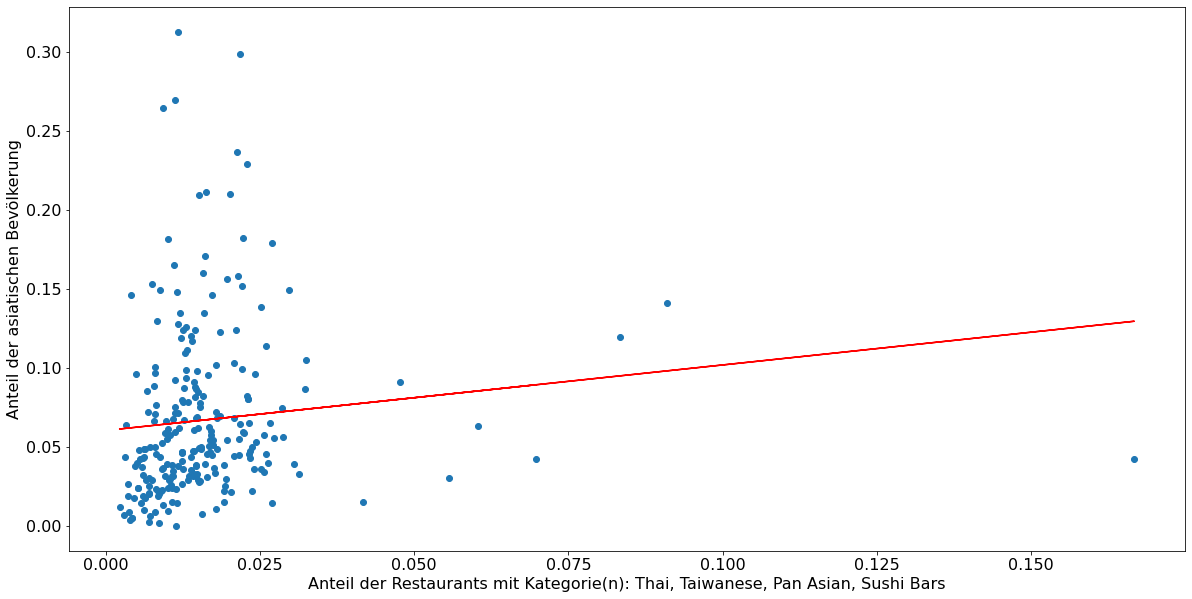

Korrelationskoeffizient:  0.11218963687079916


In [32]:
asian_cat = ["Thai", "Taiwanese", "Pan Asian", "Sushi Bars"]
soc_rat = "asian_ratio"
plot_soc_cat(soc_rat, asian_cat)

     postal  restaurant_count  categories  hispanic_rat  categories_rat
0     30002                84           1      0.000416        0.011905
1     30021               107           3      0.007680        0.028037
2     30030               917          25      0.000309        0.027263
3     30032               338           2      0.000000        0.005917
4     30033               571           8      0.000474        0.014011
..      ...               ...         ...           ...             ...
290   98665               408          23      0.013107        0.056373
291   98682                67           3      0.000000        0.044776
292   98683               538          13      0.008746        0.024164
293   98684               384          11      0.004790        0.028646
294   98685                43           1      0.014970        0.023256

[295 rows x 5 columns]


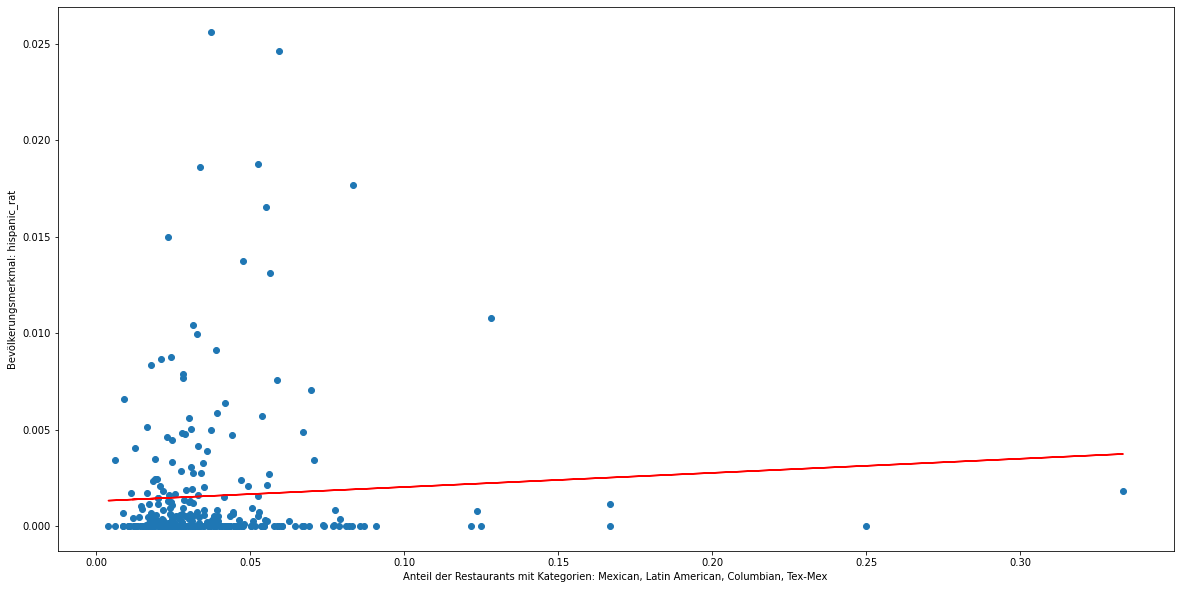

In [111]:
hispanic_cat = ["Mexican", "Latin American", "Columbian", "Tex-Mex"]
soc_rat = "hispanic_rat"
plot_soc_cat(soc_rat, hispanic_cat)

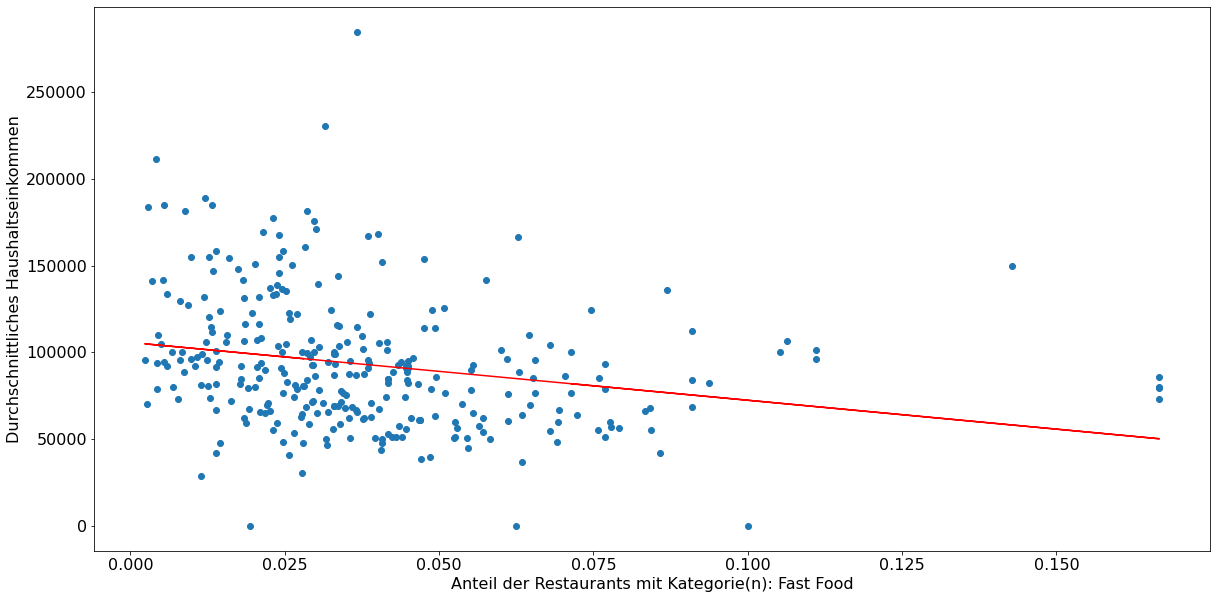

Korrelationskoeffizient:  -0.23841693616389933


In [34]:
poverty_cat = ["Fast Food"]
soc_rat = "mean_income"
plot_soc_cat(soc_rat, poverty_cat)

TypeError: unhashable type: 'numpy.ndarray'

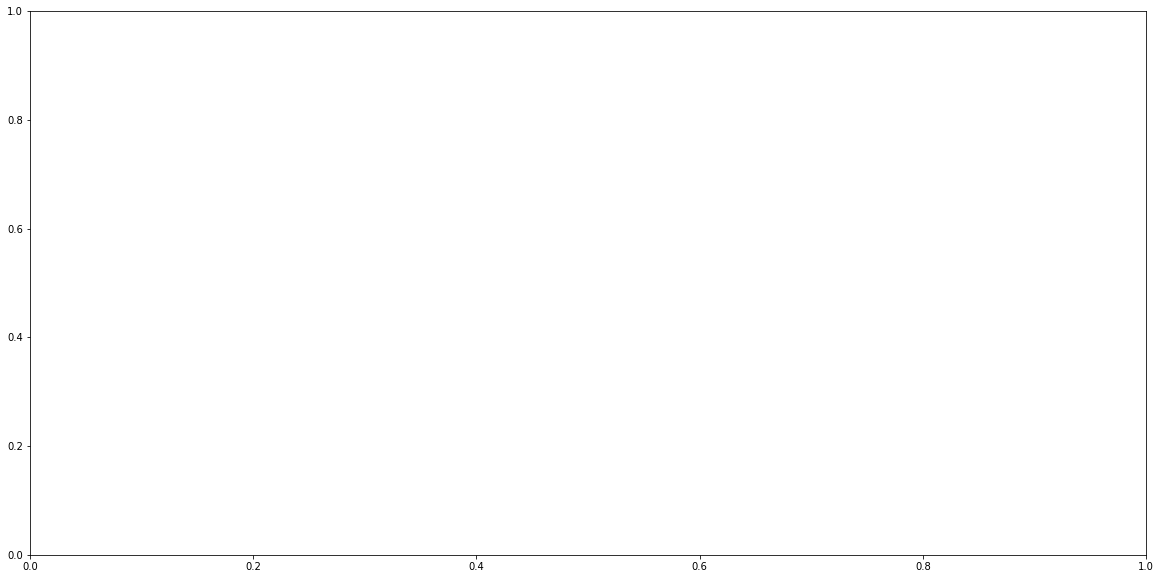

In [17]:
poverty_cat = ["Fast Food", "Fish & Chips"]
soc_rat = "unemployment_rate"
plot_soc_cat(soc_rat, poverty_cat)

In [35]:
# Korrelationen zwischen Anteil der Restaurants mit bestimmten Kategorien und Bevölkerungsmerkmal
def corr_soc_cat(cat_list):
    soc_cat = soc[soc["categories"].isin(cat_list)]
    socials = ["asian_rat", "hispanic_rat", "mean_income", "unemployment_rate"]
    dict_corr_coeff = {}
    
    for social in socials:
        
        soc_cat_agg = soc_cat.groupby(by = "postal").agg({"categories" : ['count'] , social : ['max']})
        soc_cat_agg = soc_cat_agg.reset_index()
        soc_cat_agg.columns = ["postal", "categories", social]
    
        soc_cat_rate = pd.merge(soc_res, soc_cat_agg, on = "postal")
        soc_cat_rate["categories_rat"] = soc_cat_rate.apply(lambda row: row.categories/row.restaurant_count, axis = 1)
    
        corr_coeff = soc_cat_rate["categories_rat"].corr(soc_cat_rate[social])
        
        dict_corr_coeff[social] = corr_coeff
        
    df_corr_coeff = pd.DataFrame.from_dict(dict_corr_coeff, orient='index').reset_index()
    df_corr_coeff.columns = ['Merkmal', 'Koeffizient']
    
    return df_corr_coeff

In [36]:
weighted_matrix = corr_soc_cat(["Fast Food"])
weighted_matrix

KeyError: "Column 'asian_rat' does not exist!"

In [42]:
weighted_matrix_np = weighted_matrix["Koeffizient"].to_numpy()
weighted_matrix_np

array([-0.14621022, -0.02255274, -0.25946806,  0.13775314])

In [43]:
soc_postal = soc.drop_duplicates(subset=['postal'])[["postal", "asian_rat", "hispanic_rat", "mean_income", "unemployment_rate"]]
soc_postal.set_index("postal", inplace = True)
soc_postal_normalize = (soc_postal - soc_postal.mean())/soc_postal.std()
soc_postal_normalize

,asian_rat,hispanic_rat,mean_income,unemployment_rate
postal,,,,
78729,0.657151,-0.409325,-0.423022,-0.352888
32789,-0.345618,-0.382396,1.628051,-0.424985
32714,-0.440908,0.164290,-0.554596,0.151787
97015,0.765650,2.726675,0.029278,-0.316840
97211,-0.292325,0.032492,0.196001,0.007594
...,...,...,...,...
30274,-0.358198,-0.409325,-1.123466,1.701862
80203,-0.260515,-0.409325,-0.514358,-0.497081
80002,-0.781718,-0.198624,-0.348893,-0.424985


In [46]:
weighted_soc = soc_postal_normalize * weighted_matrix_np
weighted_soc["total_score"]  = weighted_soc.sum(axis = 1)
weighted_soc.sort_values(by = "total_score", ascending = False)

,asian_rat,hispanic_rat,mean_income,unemployment_rate,total_score
postal,,,,,
30336,0.152094,0.009231,0.347027,0.820396,1.328749
97204,0.070264,0.009231,0.435323,0.681355,1.196173
34739,0.152094,0.009231,0.359476,0.567143,1.087944
30303,0.043431,0.009231,0.353902,0.641629,1.048193
43211,0.144697,0.009231,0.369215,0.447964,0.971108
...,...,...,...,...,...
32836,-0.350967,0.009231,-0.574727,-0.133029,-1.049492
78731,-0.071434,0.009231,-0.868267,-0.142961,-1.073430
78733,-0.191602,0.009231,-0.806073,-0.152892,-1.141335


In [47]:
sql("""select * from categorie;""").values.tolist()

[['Insurance', 1],
 ['Gold Buyers', 2],
 ['Post Offices', 3],
 ['Bakeries', 4],
 ['Kitchen & Bath', 5],
 ['Middle Eastern', 6],
 ['Professional Services', 7],
 ['Auto Parts & Supplies', 8],
 ['Trainers', 9],
 ['Lakes', 10],
 ['Armenian', 11],
 ['Screen Printing/T-Shirt Printing', 12],
 ['Dumplings', 13],
 ['Food Safety Training', 14],
 ['Mobile Phone Repair', 15],
 ['Pet Boarding', 16],
 ['Lighting Stores', 17],
 ['Plumbing', 18],
 ['Telecommunications', 19],
 ['Taiwanese', 20],
 ['Grocery', 21],
 ['Fruits & Veggies', 22],
 ['Auto Upholstery', 23],
 ['Beaches', 24],
 ['Indian', 25],
 ['Polish', 26],
 ['Concept Shops', 27],
 ['Pool Halls', 28],
 ['Printing Services', 29],
 ['Veterinarians', 30],
 ['Sewing & Alterations', 31],
 ['Paddleboarding', 32],
 ['Swimming Pools', 33],
 ['Arcades', 34],
 ['Photography Stores & Services', 35],
 ['Argentine', 36],
 ['Mediterranean', 37],
 ['Pan Asian', 38],
 ['Appliances', 39],
 ['Wedding Chapels', 40],
 ['Gift Shops', 41],
 ['Shaved Ice', 42],
 ['S